In [150]:
import numpy as np
import pandas as pd
df = pd.read_csv('police.csv')
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [151]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [152]:
df.shape

(91741, 15)

In [153]:
#count missing data
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [154]:
##1. Remove Columns Only with Missing Data

In [155]:
df = df.dropna(axis = 'columns', how = 'all')

In [156]:
#ALTERNATIVE
#df.drop('county_name', axis = 'columns', inplace = True )

In [157]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [158]:
##2. Do Man or Woman Speed More Often? 

In [159]:
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [160]:
df[df.driver_gender == 'M'].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [161]:
df[df.driver_gender == 'F'].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [162]:
df.groupby('driver_gender').violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

In [163]:
df[df.driver_gender == 'F'].groupby('driver_gender').violation.value_counts(normalize = True).loc[:,'Speeding']

driver_gender
F    0.6585
Name: violation, dtype: float64

In [164]:
##df[df.driver_gender == 'M'].groupby('driver_gender').violation.value_counts(normalize = True).unstack()
df[df.driver_gender == 'M'].groupby('driver_gender')['violation'].value_counts(normalize = True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [165]:
##3.

In [166]:
df['search_conducted'].value_counts(normalize = True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [167]:
df['search_conducted'].mean()

0.03483720473942948

In [168]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [169]:
df.groupby(['violation', 'driver_gender'])['search_conducted'].mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [170]:
##4.Why is search_type Missing so Often?

In [171]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [172]:
df['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [173]:
df[df['search_conducted'] == False]['search_type'].value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

In [174]:
##5.During a Search, how often is the driver frisked?

In [175]:
df['frisk'] = df['search_type'].str.contains('Protective Frisk')

In [176]:
df['frisk'].value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [177]:
df['frisk'].mean() #Not include NaN values

0.08573216520650813

In [178]:
##6.Which year had the least number of stops?

In [189]:
df['stop_date'].str.slice(0, 4).value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_date, dtype: int64

In [180]:
#Alternative
combined = df['stop_date'].str.cat(df['stop_time'], sep = ' ')

In [181]:
df['stop_datetime'] = pd.to_datetime(combined)

In [191]:
df['stop_datetime'].dt.year.value_counts().sort_values().index[0]

2005

In [192]:
##7.How does drug activity change by time of day?

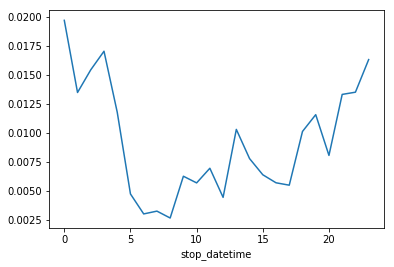

In [244]:
df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].mean().plot()  
#change df['stop_datetime'].dt.year/time/day to get more info

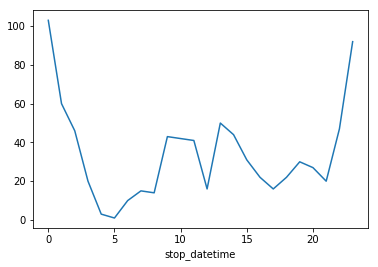

In [282]:
#Alternative: use count
df.groupby(df['stop_datetime'].dt.hour)['drugs_related_stop'].sum().plot()

In [260]:
##8.Do most stops occur at night?

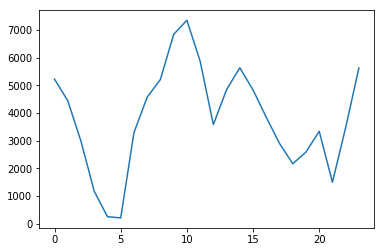

In [272]:
df['stop_datetime'].dt.hour.value_counts().sort_index().plot()
#value_counts return series -> 2 methods to sort: sort_index, sort_values

In [303]:
#Assume night =  6 AM to 6 PM 
df[(df['stop_datetime'].dt.hour > 5) & (df['stop_datetime'].dt.hour < 18)].shape

(58771, 16)

In [295]:
df[(df['stop_datetime'].dt.hour < 5) | (df['stop_datetime'].dt.hour > 18)].shape

(30592, 16)

In [304]:
##Find bad data in 'stop_duration' column and fix it.

In [317]:
df['stop_duration'].value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [329]:
df.loc[(df['stop_duration'] == '1') | (df['stop_duration'] == '2'), ['stop_duration']] = ('NaN')
#.loc is the key to replace with 'NaN'

In [334]:
df['stop_duration'].value_counts(dropna = True)

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [335]:
df['stop_duration'].value_counts(dropna = False)  #There are two 'NaN', need to further fix type problem.

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [341]:
df.loc[df['stop_duration'] == 'NaN', ['stop_duration'] ] = np.nan

In [343]:
df['stop_duration'].value_counts(dropna = False) #Joined all 'NaN' together

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64